# Excercise 5
## NLP with Keras

Use keras framework to solve the below exercises.


In [33]:
import numpy as np
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
import warnings
import re
import string
from nltk.stem import WordNetLemmatizer
import ast
from sklearn.preprocessing import MultiLabelBinarizer

warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [34]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [35]:
plots = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [36]:
plots

,plot
3107,most is the story of a single father who takes...
900,a serial killer decides to teach the secrets o...
6724,"in sweden , a female blackmailer with a disfi..."
4704,"in a friday afternoon in new york , the presi..."
2582,"in los angeles , the editor of a publishing h..."
...,...
8417,""" our marriage , their wedding . "" it ' s l..."
1592,"the wandering barbarian , conan , alongside ..."
1723,"like a tale spun by scheherazade , kismet fol..."
7605,"mrs . brisby , a widowed mouse , lives in a..."


In [37]:
y

,rating
3107,1
900,0
6724,1
4704,1
2582,1
...,...
8417,0
1592,0
1723,0
7605,1


In [38]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


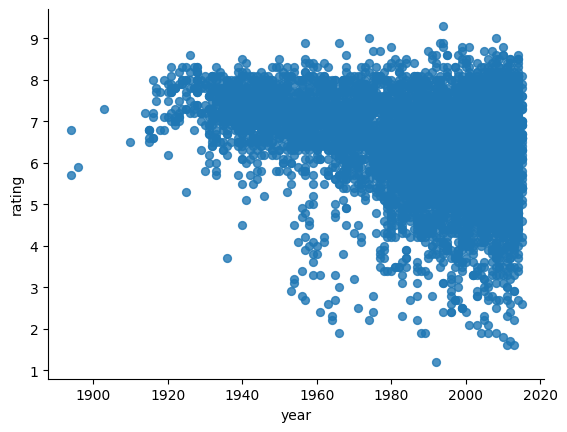

In [39]:
# @title year vs rating

from matplotlib import pyplot as plt
dataTraining.plot(kind='scatter', x='year', y='rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

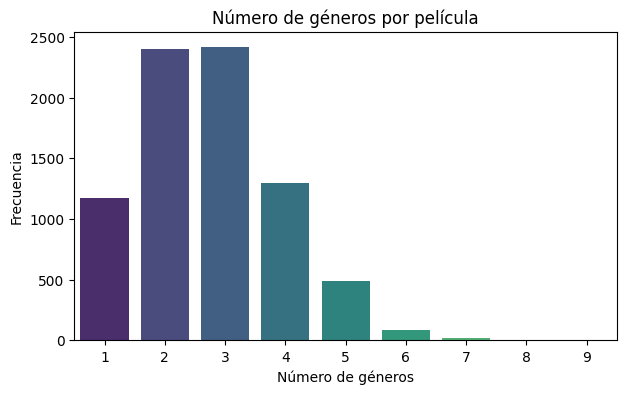

In [62]:

# Ver la cantidad de géneros por película
dataTraining['num_genres'] = dataTraining['genres'].apply(lambda x: len(x))
plt.figure(figsize=(7, 4))
sns.countplot(x='num_genres', data=dataTraining, palette='viridis')
plt.title('Número de géneros por película')
plt.xlabel('Número de géneros')
plt.ylabel('Frecuencia')
plt.show()

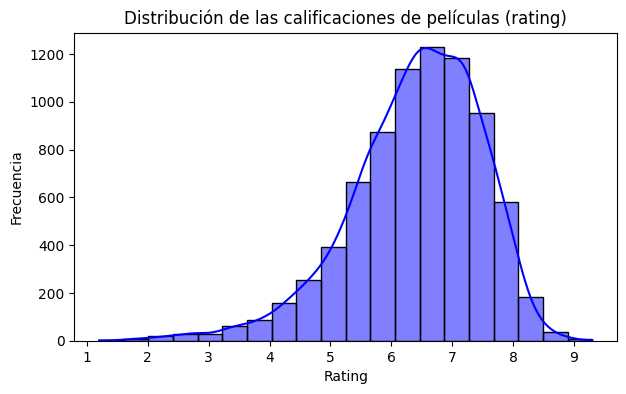

In [41]:
# Ver la distribución de las calificaciones (rating)
plt.figure(figsize=(7, 4))
sns.histplot(dataTraining['rating'], bins=20, kde=True, color='blue')
plt.title('Distribución de las calificaciones de películas (rating)')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

## Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [42]:
dataTraining['texto_combinado'] = dataTraining['title'] + " " + dataTraining['plot'] #combinar title y plot

In [43]:
longitudes = dataTraining['texto_combinado'].apply(len) #longitudes de los textos
print(longitudes)
# Encontrar la longitud máxima
longitud_maxima = longitudes.max()
print("Longitud máxima:", longitud_maxima)
longitud_promedio = longitudes.mean()
print("Longitud promedio:", longitud_promedio)

3107    1241
900      120
6724     752
4704    2083
2582    1041
        ... 
8417    1091
1592     613
1723     206
7605    1834
215      152
Name: texto_combinado, Length: 7895, dtype: int64
Longitud máxima: 9432
Longitud promedio: 765.3835338822039


In [44]:
dataTraining = dataTraining.drop_duplicates()

In [45]:
# Procesando el texto
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tokenize(text):
    '''
    Tokenize text and return a non-unique list of tokenized words found in the text.
    Normalize to lowercase, strip punctuation, remove stop words, filter non-ascii characters.
    Lemmatize the words and lastly drop words of length < 3.
    '''
    text = text.lower()  # Convertir a minúsculas
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]')
    nopunct = regex.sub(" ", text)
    words = nopunct.split(' ')  # Dividir el texto en palabras


    # remove any non ascii
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]

    # Eliminar stopwords
    words = [word for word in words if word not in stop_words]

    # Lematización
    lmtzr = WordNetLemmatizer()
    words = [lmtzr.lemmatize(w) for w in words]
    words = [w for w in words if len(w) > 2]  # Eliminar palabras cortas

    return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
# Aplicar la función tokenize a la columna 'texto_combinado'
dataTraining['texto_combinado'] = dataTraining['texto_combinado'].apply(tokenize)

# Ver el resultado
print(dataTraining['texto_combinado'])

3107    [story, single, father, take, eight, year, old...
900     [serial, killer, serial, killer, decides, teac...
6724    [woman, face, sweden, female, blackmailer, dis...
4704    [executive, suite, friday, afternoon, new, yor...
2582    [narrow, margin, los, angeles, editor, publish...
                              ...                        
8417    [family, wedding, marriage, wedding, lesson, n...
1592    [conan, destroyer, wandering, barbarian, conan...
1723    [kismet, like, tale, spun, scheherazade, kisme...
7605    [secret, nimh, brisby, widowed, mouse, life, c...
215     [tinker, bell, lost, treasure, tinker, bell, j...
Name: texto_combinado, Length: 7894, dtype: object


In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Crear el tokenizer para convertir palabras a índices
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(dataTraining['texto_combinado'])  # Ajustar el tokenizer a los datos de entrenamiento

# Convertir los textos en secuencias numéricas
sequences = tokenizer.texts_to_sequences(dataTraining['texto_combinado'])
sequences = [[word_index for word_index in seq if word_index < 5000] for seq in sequences]

# Rellenar las secuencias para que todas tengan la misma longitud
# Determinar la longitud máxima de las secuencias
max_sequence_length = max(len(x) for x in sequences)

# Rellenar las secuencias para que todas tengan la misma longitud
X_padded = pad_sequences(sequences, maxlen=max_sequence_length)


In [48]:
dataTraining['genres'] = dataTraining['genres'].map(ast.literal_eval)
matriz = MultiLabelBinarizer()
genres_encoded = matriz.fit_transform(dataTraining['genres'])

In [49]:
# Combinar las secuencias tokenizadas con las variables de 'genres'
import numpy as np
X_combined = np.hstack([X_padded, genres_encoded])

In [50]:
dataTraining.head()

,year,title,plot,genres,rating,num_genres,texto_combinado
3107,2003,Most,most is the story of a single father who takes...,"[Short, Drama]",8.0,18,"[story, single, father, take, eight, year, old..."
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"[Comedy, Crime, Horror]",5.6,29,"[serial, killer, serial, killer, decides, teac..."
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","[Drama, Film-Noir, Thriller]",7.2,34,"[woman, face, sweden, female, blackmailer, dis..."
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",[Drama],7.4,9,"[executive, suite, friday, afternoon, new, yor..."
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","[Action, Crime, Thriller]",6.6,31,"[narrow, margin, los, angeles, editor, publish..."


In [51]:
# Definir la variable objetivo (rating)
Y = dataTraining['rating']

In [52]:
Y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [53]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.2, random_state=42)

In [54]:
print(Y_train[:5])

2481     0
11121    1
3554     1
8368     1
6500     0
Name: rating, dtype: int64


In [55]:
import warnings
import ast
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Ignorar advertencias innecesarias
warnings.filterwarnings('ignore')

# Descargar recursos de NLTK
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Cargar dataset
# Se recomienda cargar el dataset previamente descargado y evitar múltiples peticiones
url = 'https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip'
dataTraining = pd.read_csv(url, encoding='UTF-8', index_col=0)

# Preprocesamiento del texto
# Combinando las columnas 'title' y 'plot'
dataTraining['texto_combinado'] = dataTraining['title'] + " " + dataTraining['plot']

# Eliminar duplicados
dataTraining = dataTraining.drop_duplicates()

# Tokenizar y preprocesar el texto
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Función de tokenización mejorada
def tokenize(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}0-9\\r\\t\\n]", " ", text)  # Eliminar puntuación y dígitos
    words = text.split()
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]  # Eliminar caracteres no ASCII
    words = [word for word in words if word not in stop_words]  # Eliminar stopwords
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2]  # Lematizar y eliminar palabras cortas
    return words

# Aplicar la función de tokenización
dataTraining['texto_combinado'] = dataTraining['texto_combinado'].apply(tokenize)

# Vectorización con TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1, 3), analyzer='word', lowercase=True, tokenizer=tokenize, stop_words='english', strip_accents='unicode', use_idf=True, min_df=10)
X_dtm = vect.fit_transform(dataTraining['texto_combinado'].apply(lambda x: ' '.join(x)))

# Procesar la columna 'genres' con MultiLabelBinarizer
dataTraining['genres'] = dataTraining['genres'].map(ast.literal_eval)
mlb = MultiLabelBinarizer()
genres_encoded = mlb.fit_transform(dataTraining['genres'])

# Combinar las secuencias tokenizadas con las variables de 'genres'
X_combined = np.hstack([X_dtm.toarray(), genres_encoded])

# Definir la variable objetivo (rating)
Y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_combined, Y, test_size=0.2, random_state=42)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

In [56]:
# Construcción del modelo
model = Sequential()

# Capa densa inicial para manejar los datos vectorizados
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Normalización y Dropout
model.add(BatchNormalization())  # Añadir normalización para ayudar al entrenamiento
model.add(Dropout(0.5))  # Aumentar dropout para reducir el sobreajuste

# Capa densa adicional
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Capa densa de salida
model.add(Dense(1, activation='sigmoid'))  # Cambiar a sigmoide para problemas de clasificación binaria

# Compilar el modelo con optimización de Adam y una función de pérdida binaria
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6436 - loss: 0.6462 - val_accuracy: 0.5890 - val_loss: 0.6783
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7699 - loss: 0.4823 - val_accuracy: 0.6802 - val_loss: 0.6130
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8611 - loss: 0.3356 - val_accuracy: 0.6757 - val_loss: 0.6445
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.1963 - val_accuracy: 0.6618 - val_loss: 0.7959
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9470 - loss: 0.1413 - val_accuracy: 0.6612 - val_loss: 1.0097
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9651 - loss: 0.1017 - val_accuracy: 0.6783 - val_loss: 1.1744
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.0803 - val_accuracy: 0.6675 - val_loss: 1.2783
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9737 - loss: 0.0682 - val_accuracy: 0

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6560 - loss: 1.4184
Test Loss: 1.3594609498977661
Test Accuracy: 66.50%


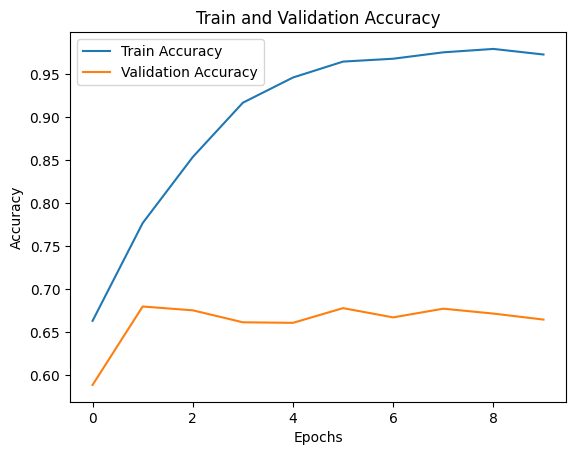

In [57]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Graficar precisión (accuracy) durante el entrenamiento
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

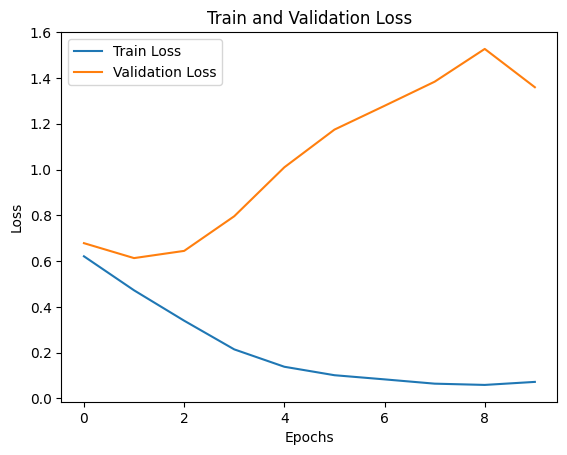

In [58]:
# Graficar la pérdida (loss) durante el entrenamiento
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


<Figure size 800x800 with 0 Axes>

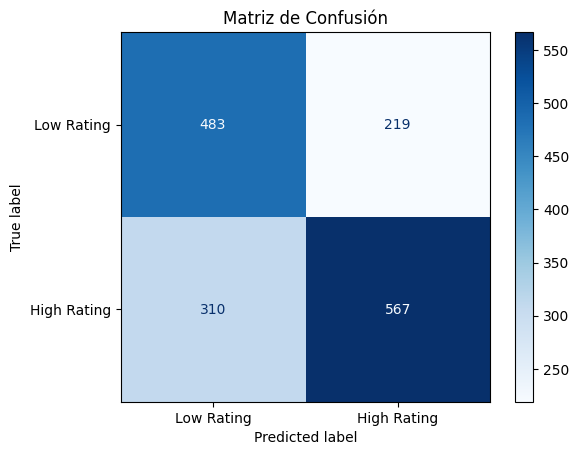

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir los valores en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Matriz de confusión
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low Rating', 'High Rating'])

plt.figure(figsize=(8, 8))
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

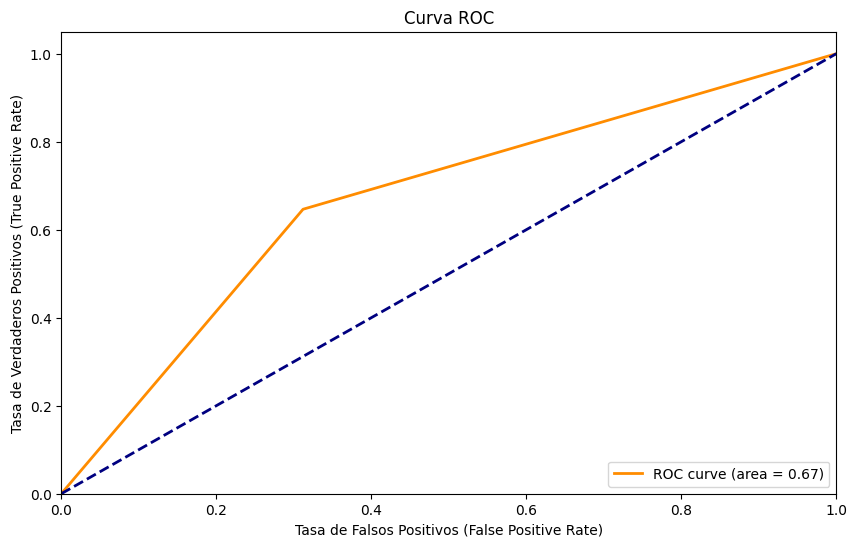

In [60]:
from sklearn.metrics import roc_curve, auc

# Calcular la curva ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Tasa de Verdaderos Positivos (True Positive Rate)')
plt.legend(loc="lower right")
plt.show()